# Matplotlib and plotnine

In this session we'll do a brief overview of two libraries useful for visualization:

- `matplotlib` is low-level Python library for plotting, inspired by Matlab 
- `plotnine` is a clone of R's ggplot2 high-level plotting library

Both of these libraries are useful in their basic form, but both have many intricacies and can be error prone. 

## Matplotlib

The IPython command `%pylab --inline` imports plotting functions from module pylab and also all the functions from `numpy`. It's often better to avoid these imports and use prefixed functions instead, by using this command: `%pylab --inline --no-import-all`. See (https://ipython.org/ipython-doc/dev/interactive/magics.html#magic-pylab)[https://ipython.org/ipython-doc/dev/interactive/magics.html#magic-pylab] for more information.

In [1]:
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


Now modules `numpy` (also renamed as `np`) and `pyplot` (also renamed as `plt`) are available in the notebook.

## Basic plots

### Line plot

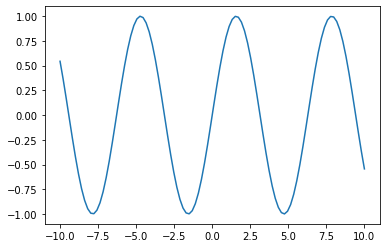

In [2]:
x = numpy.linspace(-10, 10, 100)
y = numpy.sin(x)
plt.plot(x, y)

#### Customizing plots

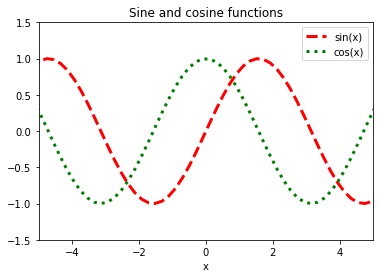

In [3]:
# Change style of line
# Add line label
plt.plot(x, y, linewidth=3, linestyle='dashed', color='red', label='sin(x)')
# Add another line
plt.plot(x, numpy.cos(x), linewidth=3, linestyle='dotted', color='green', label='cos(x)')
# Change axis ranges
plt.xlim(-5, 5)
plt.ylim(-1.5, 1.5)
# Add x-axis label
plt.xlabel("x")
# Add title
plt.title("Sine and cosine functions")
# Add legend, which will use the labels added to lines
plt.legend(loc='upper right')
# Save plot
plt.savefig('sin-cos.png')

#### Exercise 7.1

Load the data from [populations.csv](populations.csv) into a pandas DataFrame. Create a line plot with the year on the x-axis and the population of each species on the y-axis. Add axis labels, a legend and a title. The line for each species should have a different color.


Text(0.5, 1.0, 'Population change over time for three species')

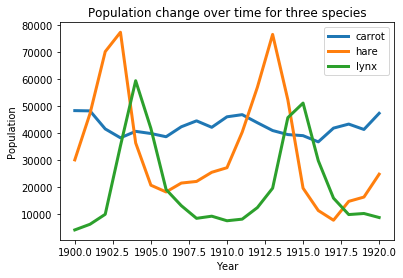

### Scatter plot

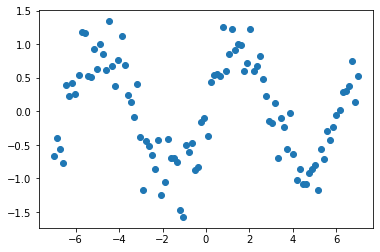

In [5]:
# Noisy sine function
x = numpy.linspace(-7, 7, 100)
e = numpy.random.normal(0, 0.3, 100)
y = numpy.sin(x) + e
plt.scatter(x, y)

#### Customizing points

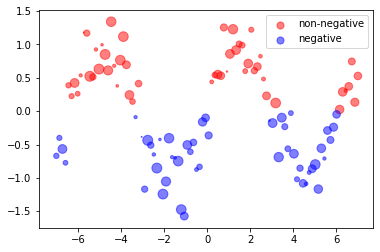

In [6]:
# Assign random area sizes to points
size = numpy.random.uniform(1,100,100)
# Plot y-values below 0 a different color
neg = y < 0.0
nonneg = y >= 0.0
plt.scatter(x[nonneg], y[nonneg], s=size, alpha=0.5, c='red', label='non-negative') 
plt.scatter(x[neg], y[neg], s=size, alpha=0.5, c='blue', label='negative')
# add transparency to better see overlapping points
plt.legend(loc='best')

#### Exercise 7.2

Load the iris dataset into a pandas DataFrame (you can use the function `pd.read_table` with the keyword argument `delim_whitespace=True` to read tabular data formatted as a space-delimited text file). 
Create a scatter plot of the first feature (Sepal length) vs the second feature (Sepal width). Make the points for different species a different color. Add title, axis labels, and a legend.

Text(0, 0.5, 'Sepal width')

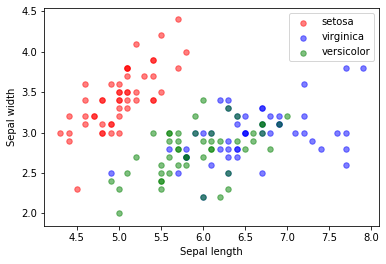

#### Exercise 7.3

Given a $m\times n$ matrix $X$ with $n$ data points and $n$ features, we can project the points to $d$ dimensional space  and store the result in matrix $X_d$ using Principal Component Analysis:
```python
from sklearn.decomposition import PCA
pca = PCA(n_components=D)
X_d = pca.fit_transform(X)
```

Project the 4-dimensional iris dataset to 2 dimensions using PCA and plot the result, with principal component 1 on the x-axis and principal component 2 on the y-axis. Label the axes and use different colors for each species.

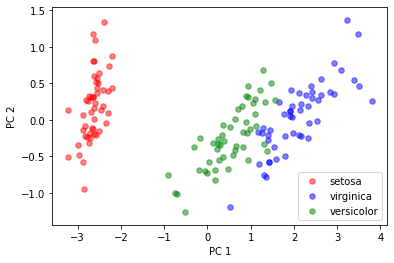

#### Multiple plots

The command `plt.subplot(r, c, i)` allows us to display the $i$th plot in a figure consisting of $r$ rows and $c$ columns.



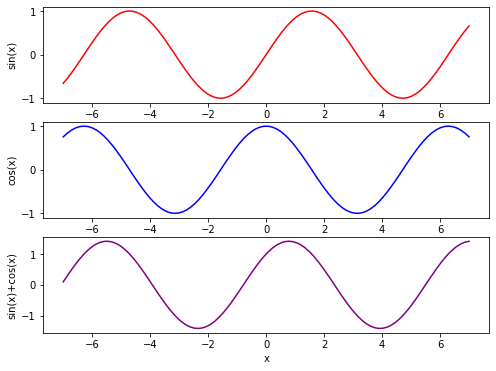

In [11]:
plt.figure(figsize=(8,6)) # Change width and height (inches)

plt.subplot(3,1,1)
plt.plot(x, numpy.sin(x), color='red')
plt.ylabel("sin(x)")

plt.subplot(3,1,2)
plt.plot(x, numpy.cos(x),color='blue')
plt.ylabel("cos(x)")

plt.subplot(3,1,3)
plt.plot(x, numpy.sin(x)+numpy.cos(x), color='purple')
plt.ylabel("sin(x)+cos(x)")
plt.xlabel("x")

plt.savefig('multiple.png')


#### Exercise 7.4

Load the data from [winequality-red.csv](winequality-red.csv) into a pandas DataFrame.
Create a figure with multiple subplots. Each subplot should be a scatterplot of one of the features in the data against the quality rating. Each subplot should also contain a legend with the name of the feature, and the correlation coefficient between it and the quality. 

- As an extra, add the linear regression line to each subplot.

## Plotnine

Plotnine is based on the API as the R plotting library ggplot2, with some necessary adaptations required by the different features of R and Python. It is a more high-level API than matplotlib.

In [12]:
from plotnine import *

Plotnine plots work with Pandas dataframes. We build a plot by mapping the columns of the dataframe to aspects of the plot, such as axes, colors or sizes.
Let's do the plot from exercise 7.1 in plotnine.

In [13]:
import pandas as pd
popu = pd.read_csv("population.csv", sep="\t", index_col='year')
popu.head()

,hare,lynx,carrot
year,,,
1900,30000.0,4000.0,48300
1901,47200.0,6100.0,48200
1902,70200.0,9800.0,41500
1903,77400.0,35200.0,38200
1904,36300.0,59400.0,40600


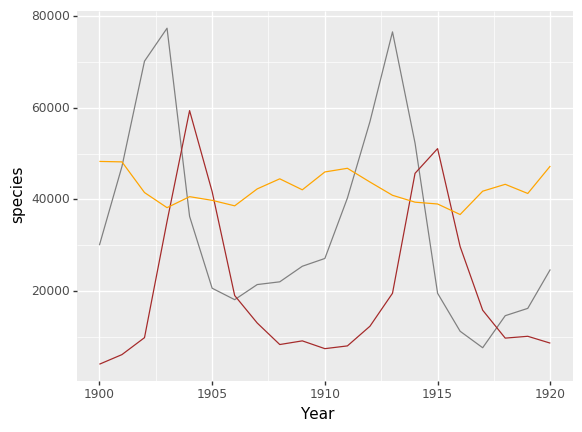

<ggplot: (8761271201558)>

In [14]:
ggplot(popu) + \
geom_line(aes(x='popu.index', y='hare'), color='grey') + \
geom_line(aes(x='popu.index', y='lynx'), color='brown') + \
geom_line(aes(x='popu.index', y='carrot'), color='orange') + \
ylab("species") + \
xlab("Year")

A more natural way of implementing this in plotnine would be to first transform the dataframe in such a way that year and species are columns, and then simply map the `year` column to the x axis and `species` column to color.

In [15]:
popu['year'] = popu.index
data = popu.melt(id_vars=['year'], value_vars=['lynx', 'carrot', 'hare'], 
                 var_name='species', value_name='population')
data

,year,species,population
0,1900,lynx,4000.0
1,1901,lynx,6100.0
2,1902,lynx,9800.0
3,1903,lynx,35200.0
4,1904,lynx,59400.0
...,...,...,...
58,1916,hare,11200.0
59,1917,hare,7600.0
60,1918,hare,14600.0
61,1919,hare,16200.0


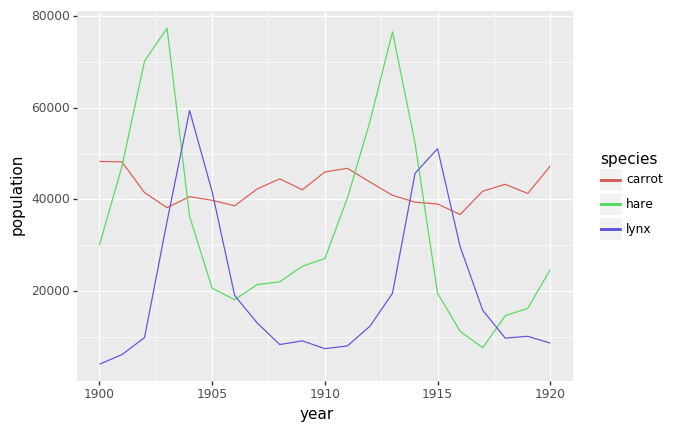

<ggplot: (8761271197360)>

In [16]:
ggplot(data, aes(x='year', y='population', color='species')) + geom_line()

### Exercise 7.5 
Redo the plot from exercise 7.2 using plotnine. 

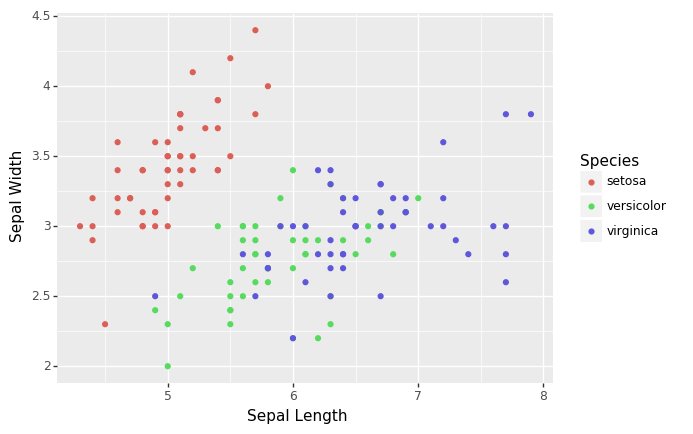

<ggplot: (8761302289493)>